#Decision Trees
Decision tress are basically rule based supervised learning method used for classification and regression.


##How to determine the structure of the Tree?


## Implementation on a sample Dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding 
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for Regression we can use
#from sklearn.tree import DecisionTreeRegressor

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree

In [32]:
data = pd.read_csv('game_sample.csv')
data
#Assumptions
#Old people have less chances of involved in Gaming
#People having an active job have less chances of involved in Gaming
#No gender stereotypes

,Gender,Age,Job,Games
0,M,18,No,Yes
1,F,36,Yes,No
2,M,24,Yes,Yes
3,M,56,Yes,No
4,F,19,No,Yes
5,F,22,No,No
6,M,43,Yes,No


In [33]:
y = data['Games']
y

0    Yes
1     No
2    Yes
3     No
4    Yes
5     No
6     No
Name: Games, dtype: object

In [34]:
X = data.drop('Games', axis =1)
X

,Gender,Age,Job
0,M,18,No
1,F,36,Yes
2,M,24,Yes
3,M,56,Yes
4,F,19,No
5,F,22,No
6,M,43,Yes


In [35]:
#label encoding of the Independent variable
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Job'] = le.fit_transform(X['Job'])
X

,Gender,Age,Job
0,1,18,0
1,0,36,1
2,1,24,1
3,1,56,1
4,0,19,0
5,0,22,0
6,1,43,1


In [36]:
#label encoding of the Dependent variable
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 0])

In [37]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (5, 3)
Testing split input-  (2, 3)


In [38]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 1]])

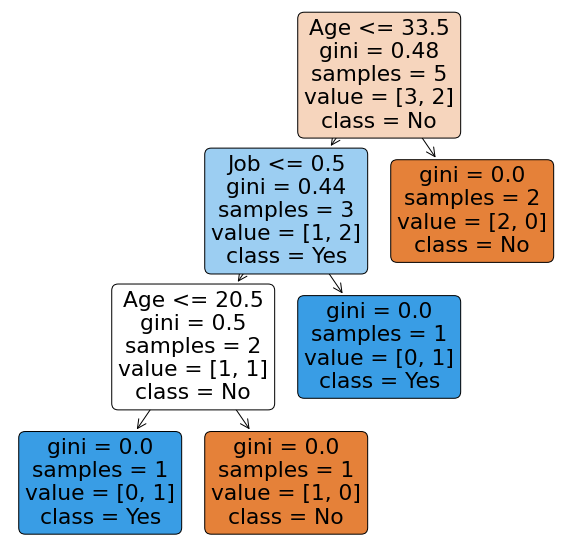

In [40]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names = ["No","Yes"] , filled = True , precision = 2, rounded = True)

plt.savefig("dtree.png")

## Implementation on a real life Dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding 
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for Regression we can use
#from sklearn.tree import DecisionTreeRegressor

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree

In [42]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
#Chceking for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
df.shape

(150, 5)

In [45]:
y = df['species']
X = df.drop('species', axis =1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [47]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:
#label encoding of the target variable
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (105, 4)
Testing split input-  (45, 4)


### Building a tree

In [50]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

### Testing

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

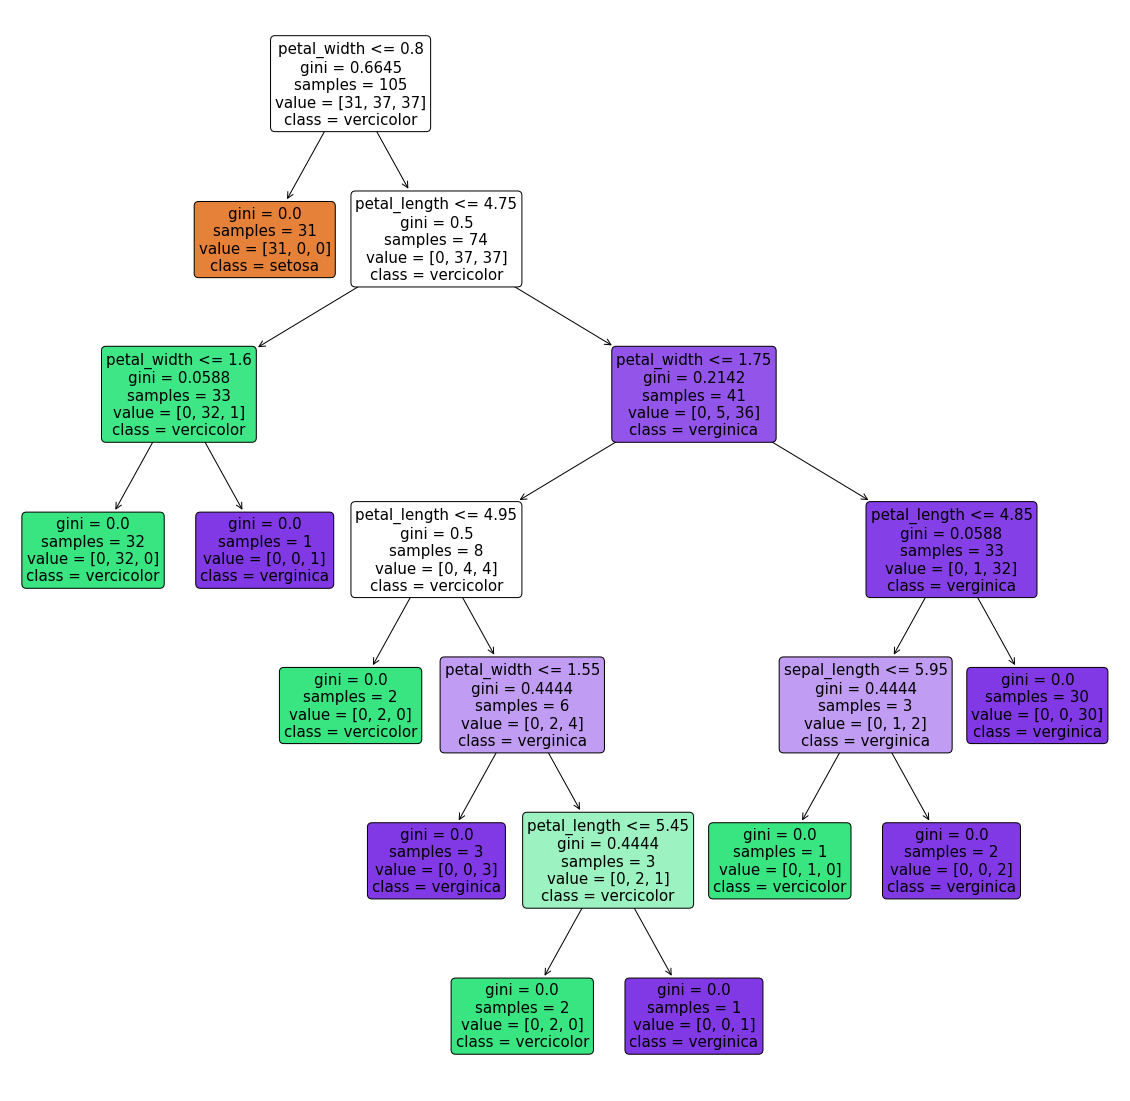

In [52]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

plt.savefig("dtree.png")

## Advanced
[Optional]

####DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

####Characteristics 
http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of.html

####Hyperparameter Tuning
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

####Decision Tress Regression
https://www.saedsayad.com/decision_tree_reg.htm